In [1]:
import pandas as pd

import sys
import os

import numpy as np
import pandas as pd

import cv2
import PIL as Image
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append("../")

from utils import myImg2 as myimg
from utils import config as cutil


In [2]:
#initialize key variables.

cdir = '/disk1/data1/ret/gpu_tf/'
ddir = '/disk1/data1/data/'
imgdir = ddir  + 'px_he/'
o_imgdir = ddir + 'idrid/ex/'
model_dir = ddir + 'models/inception/'
model_name = 'incep_basic_lr01.cpkt'
iconfig = cutil.Config(configid='c1',cdir=cdir)

In [3]:
#get Image
def get_img(ipath):
    return myimg.myImg( imageid=ipath, config=iconfig, path=ipath)


In [4]:
#get image form npy
def get_img_from_npy(ipath):
    return np.load(ipath)

img_id[IDRiD_50_1873] sum ti_im[6351.854901960784] size ti_im[(128, 128)] max pi[255.0]


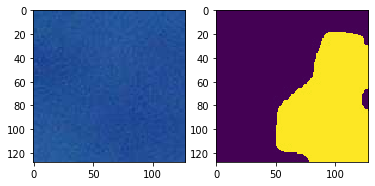

[[[ 32.  84. 151.]
  [ 30.  83. 150.]
  [ 30.  82. 149.]
  ...
  [ 34.  84. 156.]
  [ 29.  77. 149.]
  [ 23.  73. 145.]]

 [[ 34.  86. 153.]
  [ 32.  85. 152.]
  [ 31.  84. 151.]
  ...
  [ 35.  83. 155.]
  [ 31.  79. 151.]
  [ 28.  76. 148.]]

 [[ 35.  87. 154.]
  [ 34.  87. 154.]
  [ 33.  86. 153.]
  ...
  [ 34.  82. 154.]
  [ 33.  81. 153.]
  [ 32.  80. 152.]]

 ...

 [[ 50.  99. 167.]
  [ 48.  97. 165.]
  [ 45.  94. 162.]
  ...
  [ 41.  84. 157.]
  [ 40.  83. 156.]
  [ 37.  83. 154.]]

 [[ 49.  98. 166.]
  [ 48.  97. 165.]
  [ 46.  95. 163.]
  ...
  [ 40.  83. 156.]
  [ 37.  80. 153.]
  [ 33.  79. 150.]]

 [[ 46.  95. 163.]
  [ 44.  96. 163.]
  [ 45.  94. 162.]
  ...
  [ 37.  83. 154.]
  [ 35.  78. 151.]
  [ 31.  77. 148.]]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 255. 255. 255.]
 [  0.   0.   0. ... 255. 255. 255.]
 [  0.   0.   0. ... 255. 255. 255.]]


In [37]:
#display patches
def show_patch(img_id,patch_id):
    '''
    oi_im = get_img_from_npy( imgdir + img_id + '_' + patch_id + '_oi.npy')
    ti_im = get_img_from_npy( imgdir + img_id + '_' + patch_id + '_ti.npy')
    '''
    for i in range(4000):
        oi_im = get_img_from_npy( imgdir + img_id + '_' + str(i) + '_oi.npy')
        ti_im = get_img_from_npy( imgdir + img_id + '_' + str(i) + '_ti.npy')
        if (ti_im/255).sum() > 5000:
            print("img_id[{}] sum ti_im[{}] size ti_im[{}] max pi[{}]".
                  format(img_id + '_' + str(i),ti_im.sum()/255,ti_im.shape,ti_im.max()))    
            show_images([oi_im.astype(np.uint8),ti_im.astype(np.uint8)])
            break
    
    '''
    #stack images side by side
    img_hstack = np.hstack((oi_im, ti_im))
    img_hconcat = np.concatenate((oi_im, ti_im), axis=1)
    cv2.imshow(' img_hconcat patch - [' + str(i) + ']', img_hconcat.astype(np.float32)/255) 
    '''
    #show_images([oi_im.astype(np.uint8),ti_im])
    print(oi_im)
    print(ti_im)
    
show_patch('IDRiD_50','1815')

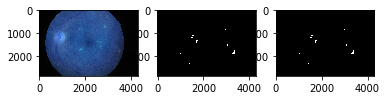

In [8]:
def show_images(images: list) -> None:
    n: int = len(images)
    f = plt.figure()
    for i in range(n):
        # Debug, plot figure
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i])

    plt.show(block=True)
    
def show_main_image(img_id):
    o_img = get_img(o_imgdir + 'images/' + img_id + '.jpg').getImage()
    t_img = get_img(o_imgdir + 'gt/' + img_id + '_HE.jpg').getImage()
    other_dir = 'idrid/IDRID_sharable_data/images_with_ground_truth/DRIVE/training_HE/1st_manual/'
    other_img = get_img(ddir + other_dir + img_id + '_HE.jpg').getImage()
    
    show_images([o_img,t_img,other_img])

#idrid/IDRID_sharable_data/images_with_ground_truth/DRIVE/training_HE/1st_manual/IDRiD_50_HE.jpg
img_id = 'IDRiD_50'
show_main_image(img_id)